             Customer Segmentation for Marketing Strategy

dataset:
id: A unique identifier for each customer in the dataset.

customer_age: The age of the customer. Age can influence the likelihood of subscribing to term deposits.

job_type: The type of job the customer holds. Job types may correlate with financial stability and interest in term deposits.

marital: The marital status of the customer (e.g., single, married). Marital status could affect financial decisions, including investments in term deposits.

education: The educational background of the customer (e.g., primary, secondary, tertiary). Higher education levels might be associated with better financial literacy.

default: Indicates whether the customer has credit in default (yes/no). Customers with a history of default might be less likely to subscribe to new financial products.

balance: The customer’s bank balance. A higher balance might indicate a greater ability to invest in term deposits.

housing_loan: Indicates whether the customer has a housing loan (yes/no). Existing loans may influence a customer’s decision to subscribe to additional financial products.

personal_loan: Indicates whether the customer has a personal loan (yes/no). Similar to housing loans, personal loans might affect a customer’s financial decisions.

communication_type: The type of communication used in the campaign (e.g., cellular, unknown). This could indicate the method through which the campaign was conducted.

day_of_month: The specific day of the month when the last contact with the customer was made. Timing of contact might play a role in the campaign's effectiveness.

month: The month in which the last contact was made. Seasonal trends might influence customer behavior.

last_contact_duration: The duration (in seconds) of the last contact with the customer. Longer conversations might indicate higher interest.

num_contacts_in_campaign: The number of contacts made during the current campaign. More contacts could imply persistence or customer interest.

days_since_prev_campaign_contact: The number of days since the last contact in a previous campaign. A shorter gap might influence the likelihood of a positive response.

num_contacts_prev_campaign: The number of contacts made in previous campaigns. This might indicate previous efforts to convert the customer.

prev_campaign_outcome: The outcome of the previous campaign (e.g., success, failure). Past behavior is often a predictor of future actions.

term_deposit_subscribed: The target variable, indicating whether the customer subscribed to a term deposit (1 for yes, 0 for no). This is what the bank aims to predict using the other features.

the dataset contain 31647 rows and 18 column

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv('/content/Train.csv')

In [ ]:
train_df.shape

(31647, 18)

EDA

univariate

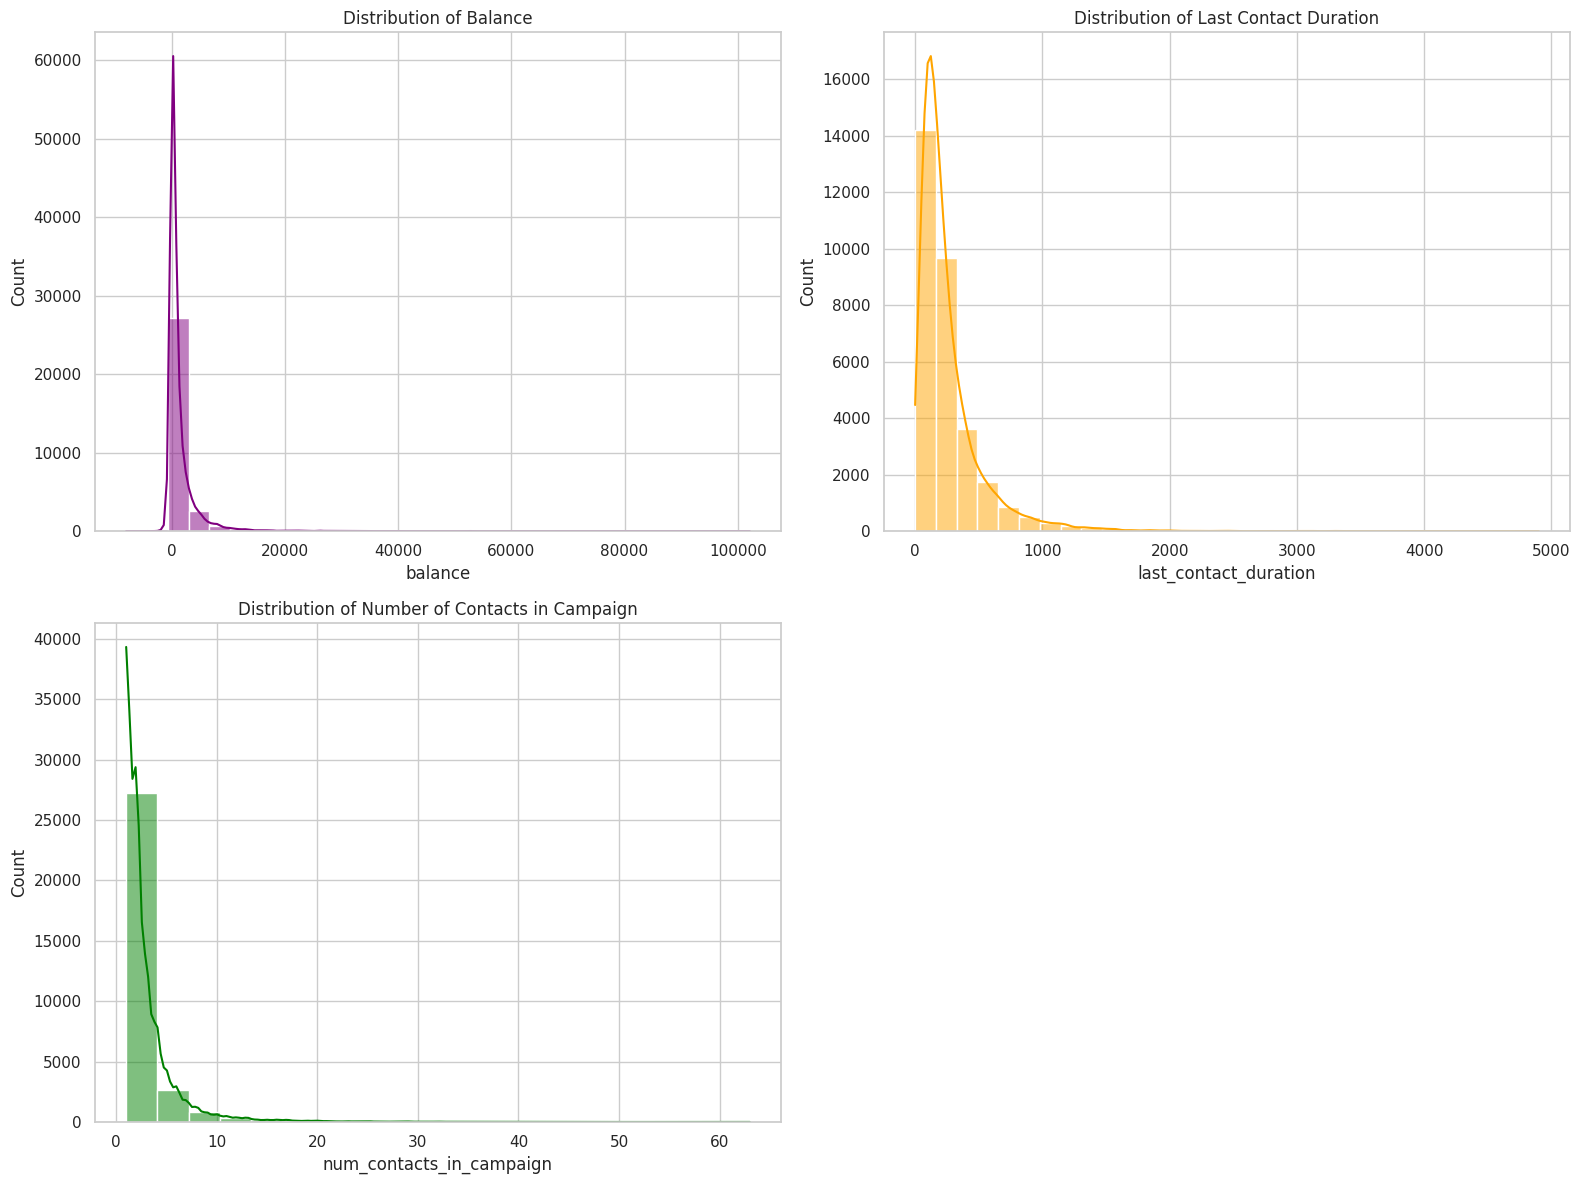

In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Distribution plots for numerical features
plt.figure(figsize=(16, 12))

# Subplot 1: Balance Distribution
plt.subplot(2, 2, 1)
sns.histplot(train_df['balance'], kde=True, bins=30, color='purple')
plt.title('Distribution of Balance')

# Subplot 2: Last Contact Duration Distribution
plt.subplot(2, 2, 2)
sns.histplot(train_df['last_contact_duration'], kde=True, bins=30, color='orange')
plt.title('Distribution of Last Contact Duration')

# Subplot 3: Number of Contacts in Campaign
plt.subplot(2, 2, 3)
sns.histplot(train_df['num_contacts_in_campaign'], kde=True, bins=20, color='green')
plt.title('Distribution of Number of Contacts in Campaign')

plt.tight_layout()
plt.show()


balance:The distribution is heavily skewed to the right, meaning that most accounts have a small balance, while a few accounts have a very large balance.
Last Contact Duration: The length of the last contact with a customer. This distribution is also heavily skewed to the right, with most contacts being relatively short, while a few contacts are very long.
Number of Contacts in Campaign: The number of times a customer has been contacted during a marketing campaign. This distribution is also skewed to the right, with most customers having been contacted a few times, while a few customers have been contacted many times.

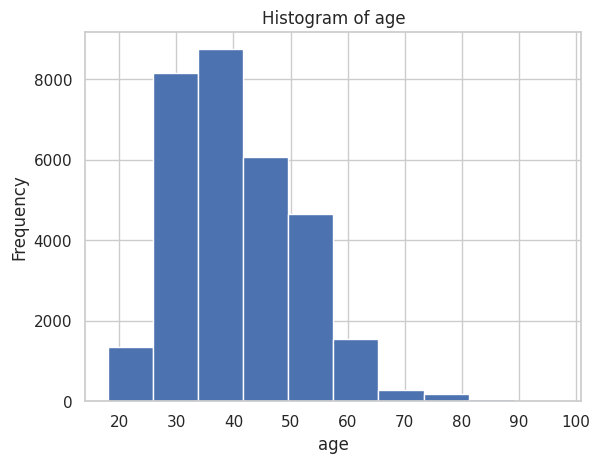

In [ ]:
plt.hist(train_df['customer_age'], bins=10)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

The people are mostly in between the age of 30-50.There are a few people who are 80 years old and older.

<ipython-input-10-3dab2643d333>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="Set2")


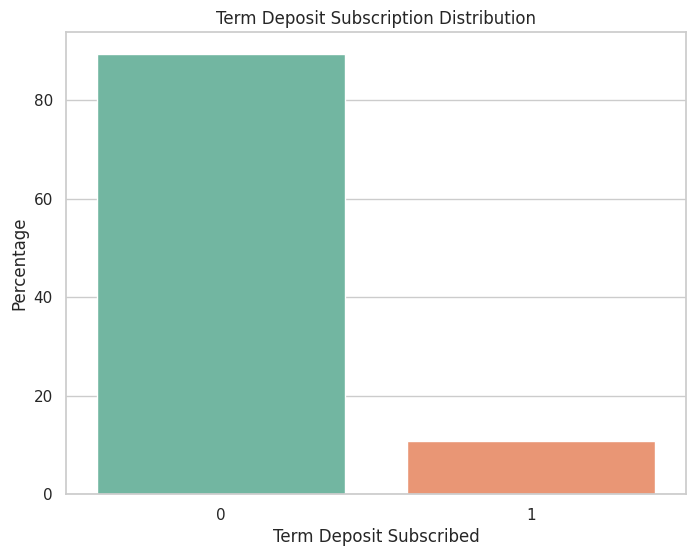

In [ ]:
# Distribution of the target variable
target_distribution = train_df['term_deposit_subscribed'].value_counts(normalize=True) * 100

# Plotting target variable distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="Set2")
plt.title('Term Deposit Subscription Distribution')
plt.ylabel('Percentage')
plt.xlabel('Term Deposit Subscribed')
plt.show()

the subscribed percentage is only 10 percentage and there is an imbalance in distribution.

In [ ]:
train_df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [ ]:
# Summary statistics for categorical features
categorical_summary = train_df.describe(include=['object'])
print("Summary of Categorical Features:")
print(categorical_summary)


Summary of Categorical Features:
              id     job_type  marital  education default housing_loan  \
count      31647        31647    31497      31647   31647        31647   
unique     31647           12        3          4       2            2   
top     id_43823  blue-collar  married  secondary      no          yes   
freq           1         6816    18945      16247   31094        17700   

       personal_loan communication_type  month prev_campaign_outcome  
count          31498              31647  31647                 31647  
unique             2                  3     12                     4  
top               no           cellular    may               unknown  
freq           26463              20480   9685                 25833  


In [ ]:
train_df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


The customer_age ranges from 18 to 97 years, with an average of around 40 years.The balance has a wide range, from -8,020 to 102,128, indicating some customers may have negative balances.last_contact_duration shows a moderate positive correlation with num_contacts_in_campaign, suggesting that longer contact durations might be associated with more contacts.


In [ ]:
train_df.isnull().sum()

,0
id,0
customer_age,619
job_type,0
marital,150
education,0
default,0
balance,399
housing_loan,0
personal_loan,149
communication_type,0


In [ ]:
train_df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [ ]:
train_df['term_deposit_subscribed'].unique()

array([0, 1])

In [ ]:
for i in train_df.columns:
  missing_perc=(train_df[i].isnull().sum()/len(train_df))*100
  print(f'{i}: {missing_perc:.2f}%')

id: 0.00%
customer_age: 1.96%
job_type: 0.00%
marital: 0.47%
education: 0.00%
default: 0.00%
balance: 1.26%
housing_loan: 0.00%
personal_loan: 0.47%
communication_type: 0.00%
day_of_month: 0.00%
month: 0.00%
last_contact_duration: 0.98%
num_contacts_in_campaign: 0.35%
days_since_prev_campaign_contact: 81.62%
num_contacts_prev_campaign: 0.00%
prev_campaign_outcome: 0.00%
term_deposit_subscribed: 0.00%


<ipython-input-9-5a8284566cc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[feature], palette="Set2")
<ipython-input-9-5a8284566cc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[feature], palette="Set2")
<ipython-input-9-5a8284566cc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[feature], palette="Set2")
<ipython-input-9-5a8284566cc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fa

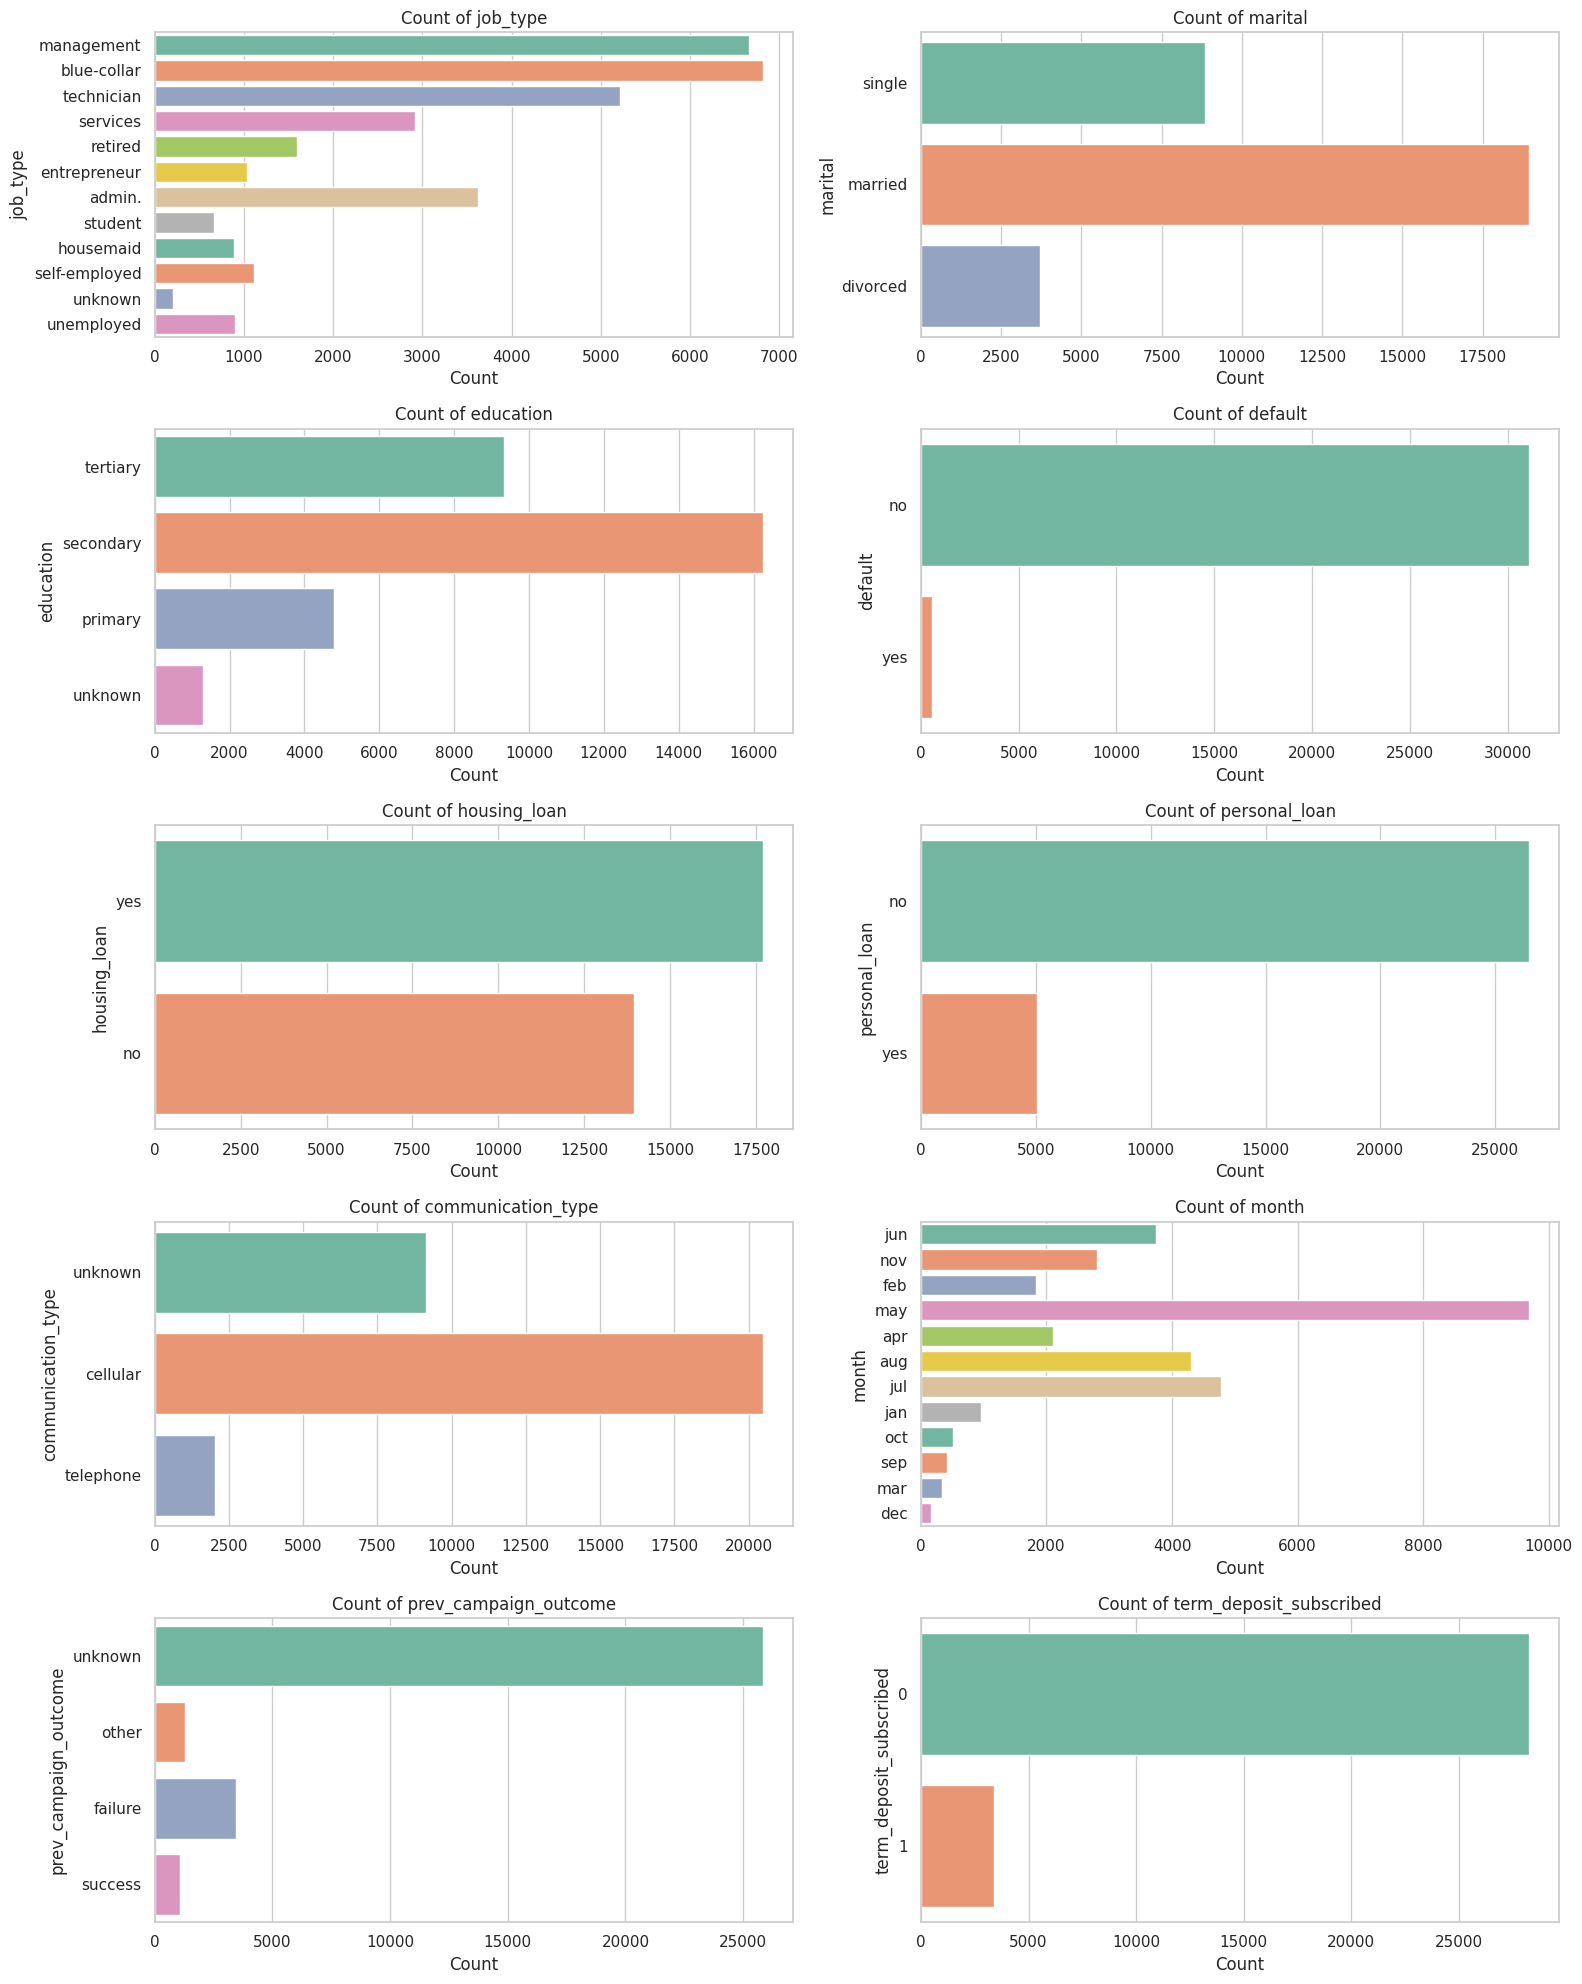

In [ ]:
categorical_features = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan',
                        'communication_type', 'month', 'prev_campaign_outcome', 'term_deposit_subscribed']

plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=train_df[feature], palette="Set2")
    plt.title(f'Count of {feature}')
    plt.ylabel(f'{feature}')
    plt.xlabel('Count')
plt.tight_layout()
plt.show()

1.Count of job_type:
Insight: The most common job types in the dataset are management, blue-collar, and technician. Jobs like self-employed, unemployed, housemaid, and unknown are less common.
Interpretation: The distribution of job types indicates that the bank's customer base is diverse, with a significant portion working in management and blue-collar jobs.
2. Count of marital:
Insight: The majority of customers are married, followed by single and then divorced.
Interpretation: This shows that the bank has a predominantly married customer base, which might be relevant when considering financial products targeted at families.
3. Count of education:
Insight: Most customers have a secondary education, followed by tertiary and then primary.
Interpretation: The education level might influence how customers perceive financial products and services, with those having higher education potentially being more aware of term deposits and other investment opportunities.
4. Count of default:
Insight: The vast majority of customers have not defaulted (no), with only a small number showing a yes for default.
Interpretation: This suggests that the bank's customer base is largely creditworthy, which is a positive sign for loan and credit-related products.
5. Count of housing_loan:
Insight: More customers have a housing_loan (yes) compared to those who do not (no).
Interpretation: Housing loans are a common financial product among the bank's customers, which could be a point of leverage when promoting term deposits as a secure way to save money for loan payments.
6. Count of personal_loan:
Insight: Most customers do not have a personal_loan (no), with a smaller number having one (yes).
Interpretation: Personal loans are less common, which might suggest a focus area for the bank to encourage more customers to consider personal loans in conjunction with term deposits.
7. Count of communication_type:
Insight: The most common mode of communication is cellular, followed by unknown and then telephone.
Interpretation: Cellular phones are the dominant communication channel, highlighting the importance of mobile-friendly campaign strategies.
8. Count of month:
Insight: The highest number of campaign contacts occurred in may, followed by jul, aug, and nov.
Interpretation: These months might have been peak times for campaigns, possibly due to strategic timing (e.g., before holiday seasons). Understanding why these months were more active could help in planning future campaigns.
9. Count of prev_campaign_outcome:
Insight: Most previous campaign outcomes are unknown, followed by failure, other, and success.
Interpretation: The large number of unknown outcomes could indicate a lack of proper tracking in past campaigns. This might need addressing to improve future marketing strategies.
10. Count of term_deposit_subscribed:
Insight: The majority of customers did not subscribe to the term deposit (0), with a smaller portion having subscribed (1).
Interpretation: This imbalance indicates that a significant challenge exists in converting customers to subscribe to term deposits, which might require more targeted or effective marketing efforts.

bivariate

<ipython-input-10-90c9d1fc7ab1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='term_deposit_subscribed', y='balance', data=train_df, palette="Set3")
<ipython-input-10-90c9d1fc7ab1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='term_deposit_subscribed', y='customer_age', data=train_df, palette="Set3")
<ipython-input-10-90c9d1fc7ab1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='term_deposit_subscribed', y='last_contact_duration', data=train_df, palette="Set3")
<ipython-input-10-90c9d1fc7ab1>:21: FutureWarning: 

Passing `pa

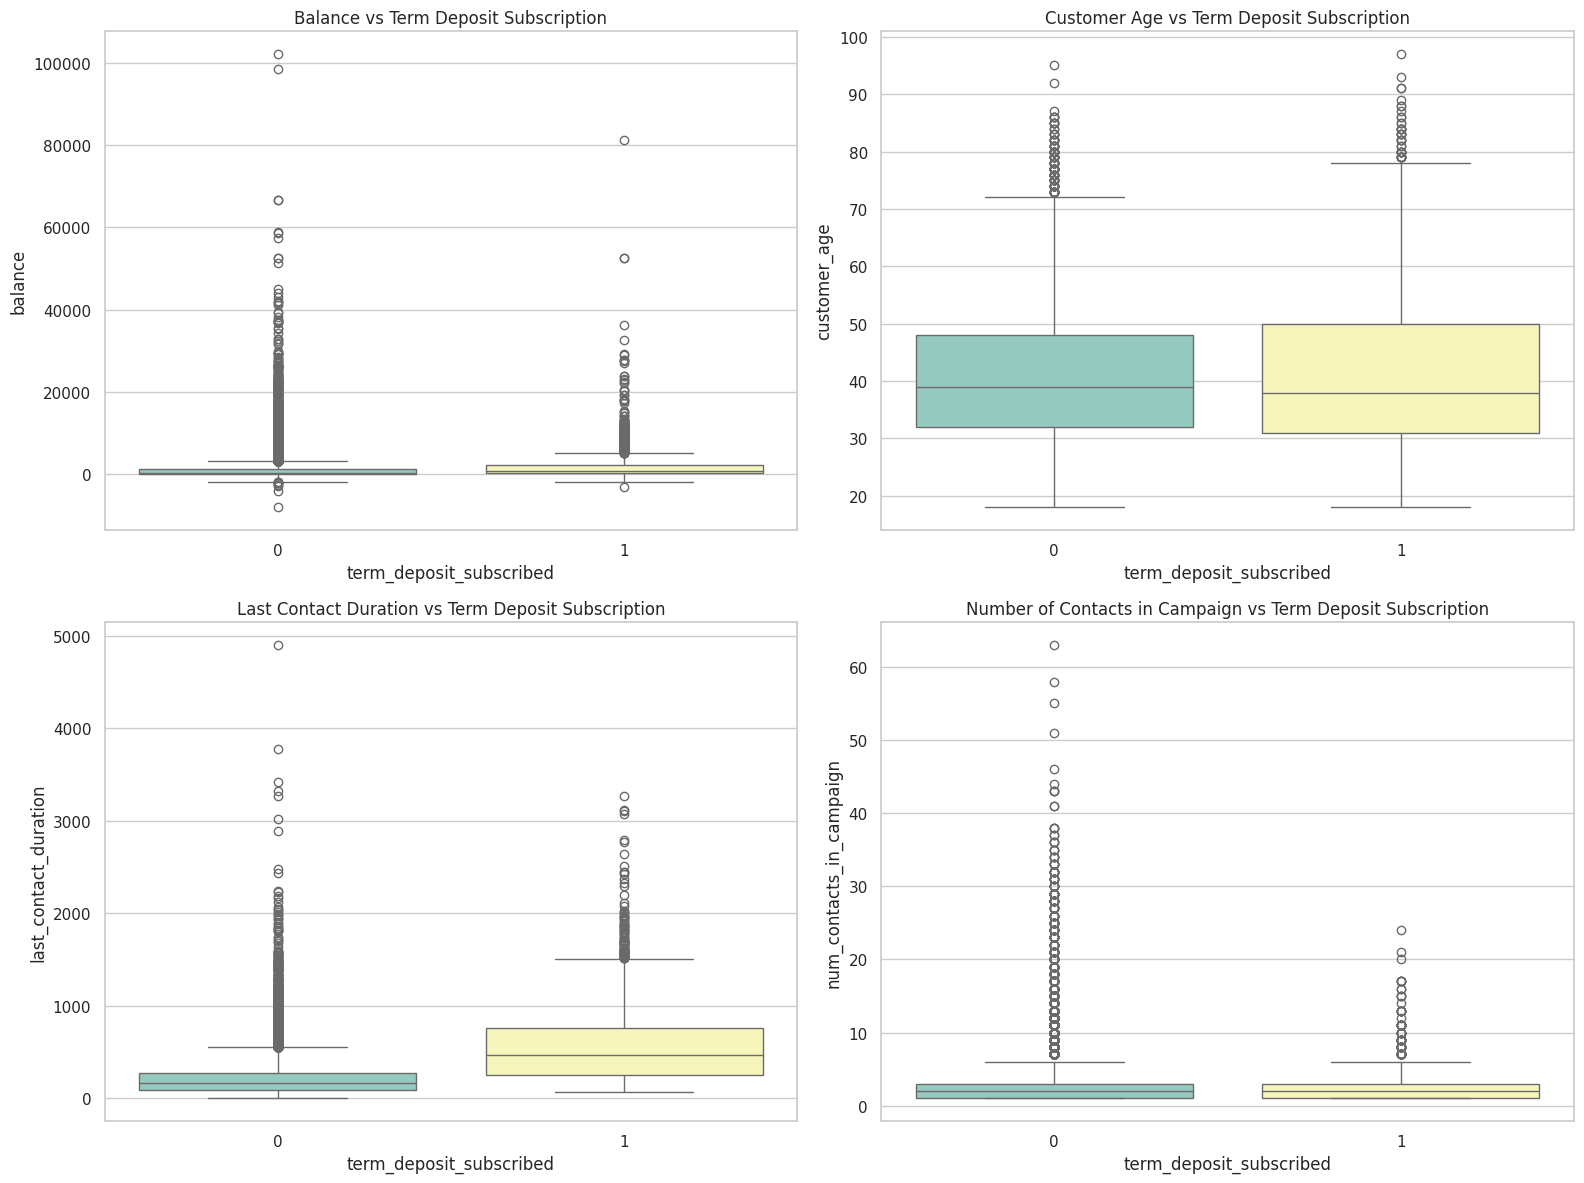

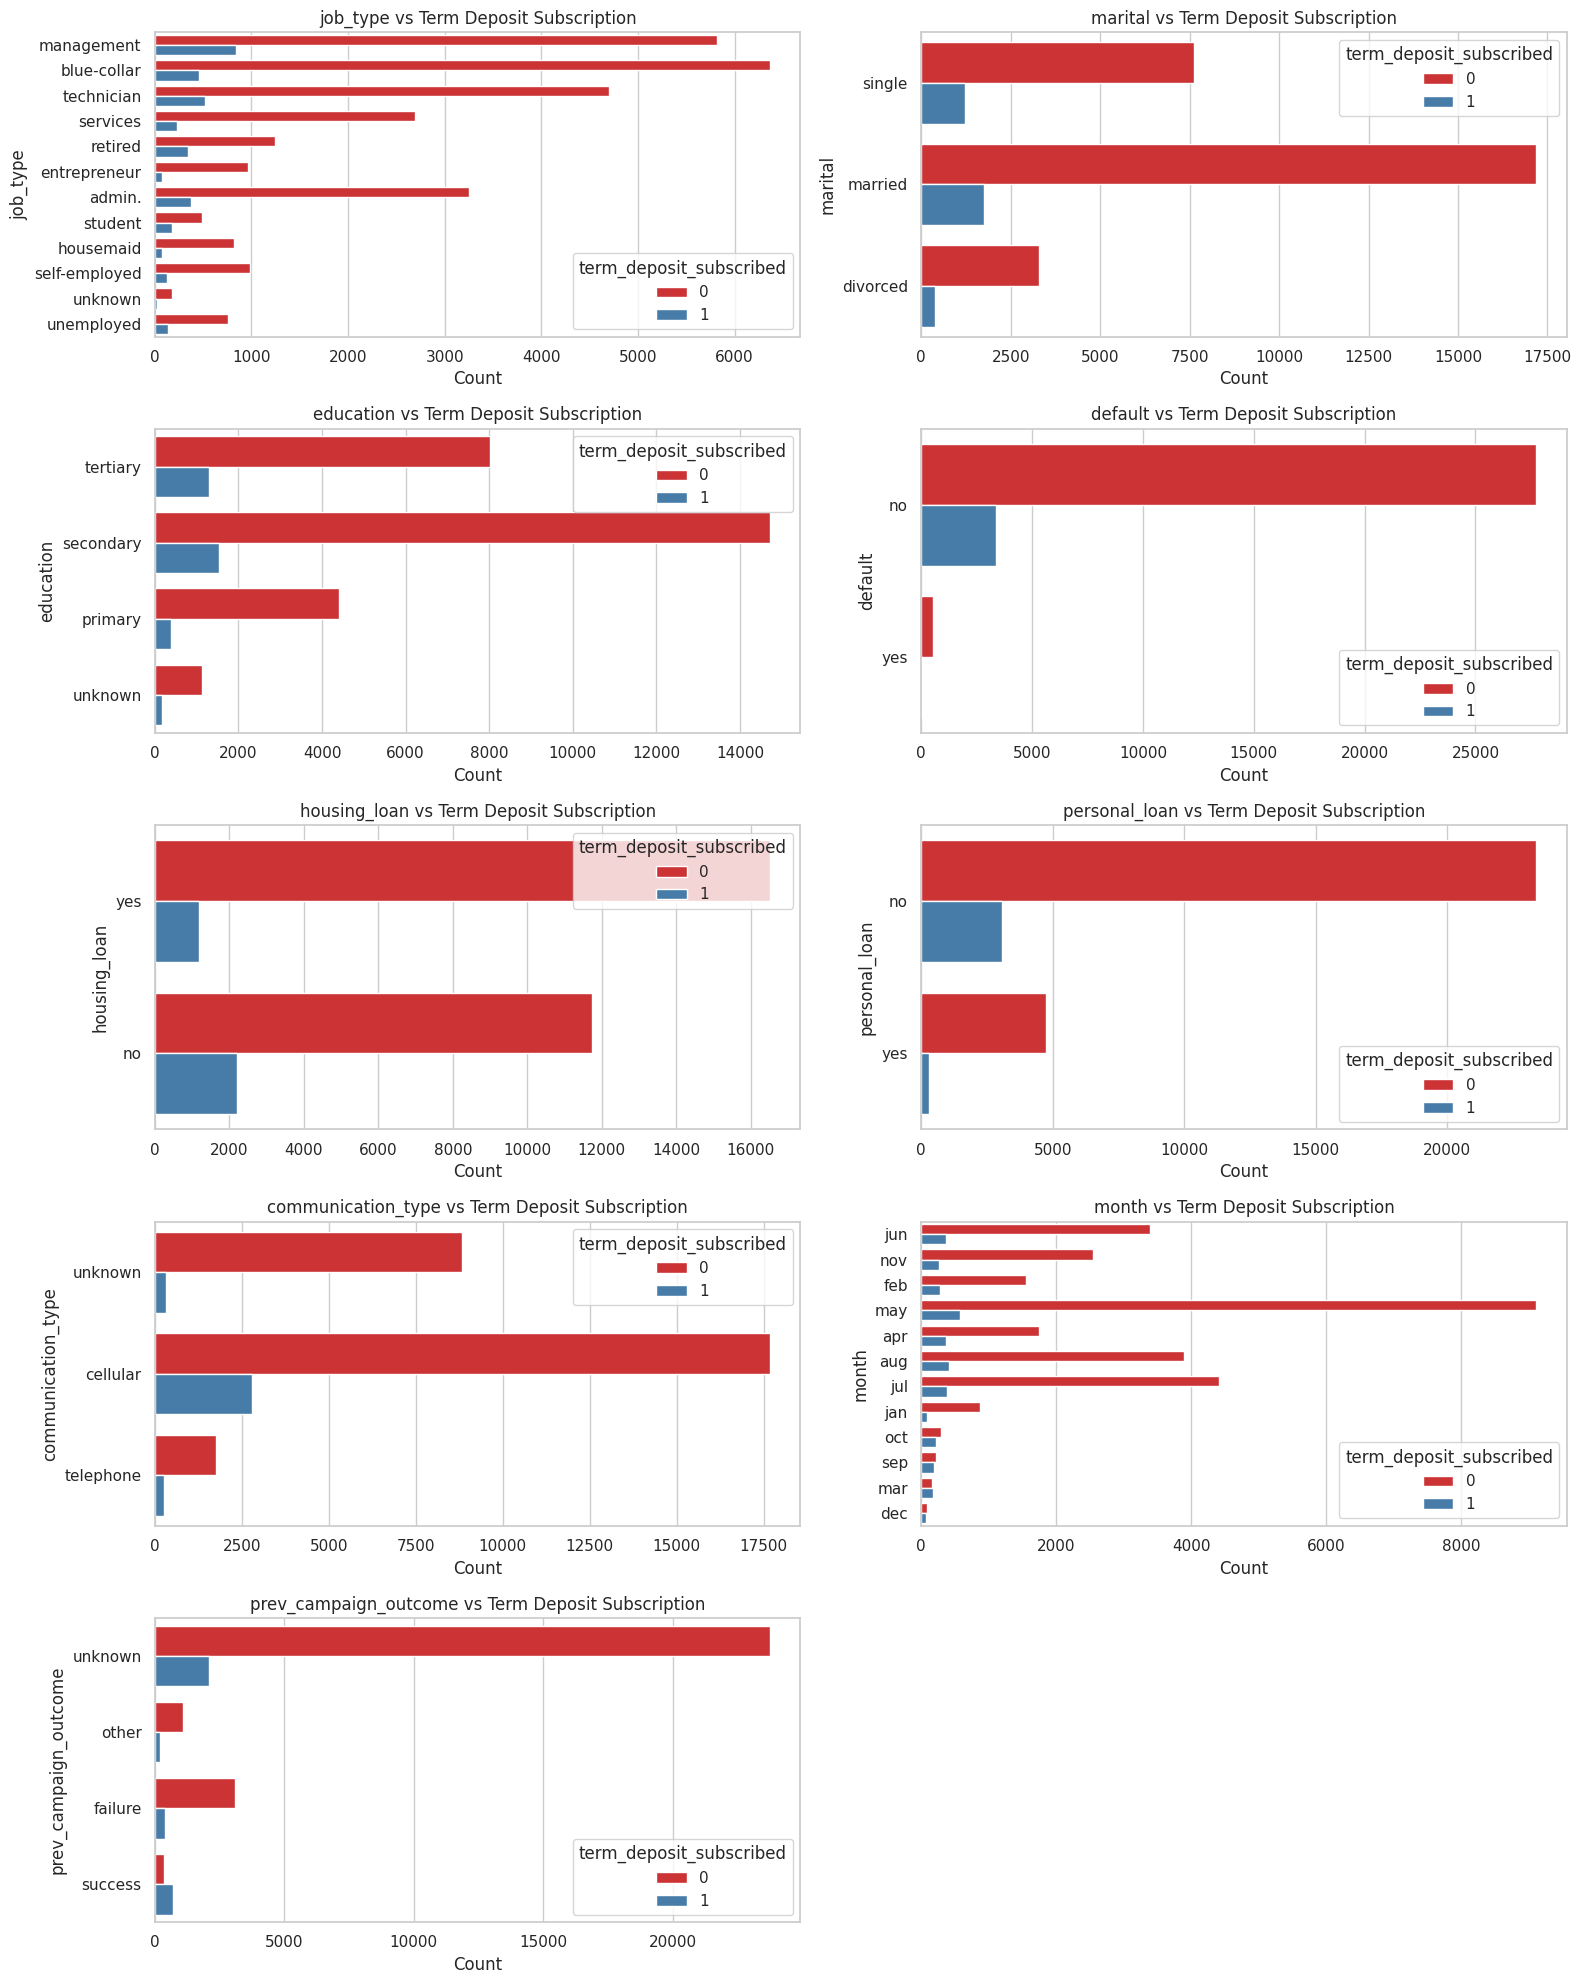

In [ ]:
# Bivariate Analysis between Numerical Features and Target Variable
plt.figure(figsize=(16, 12))

# Balance vs Term Deposit Subscription
plt.subplot(2, 2, 1)
sns.boxplot(x='term_deposit_subscribed', y='balance', data=train_df, palette="Set3")
plt.title('Balance vs Term Deposit Subscription')

# Customer Age vs Term Deposit Subscription
plt.subplot(2, 2, 2)
sns.boxplot(x='term_deposit_subscribed', y='customer_age', data=train_df, palette="Set3")
plt.title('Customer Age vs Term Deposit Subscription')

# Last Contact Duration vs Term Deposit Subscription
plt.subplot(2, 2, 3)
sns.boxplot(x='term_deposit_subscribed', y='last_contact_duration', data=train_df, palette="Set3")
plt.title('Last Contact Duration vs Term Deposit Subscription')

# Number of Contacts in Campaign vs Term Deposit Subscription
plt.subplot(2, 2, 4)
sns.boxplot(x='term_deposit_subscribed', y='num_contacts_in_campaign', data=train_df, palette="Set3")
plt.title('Number of Contacts in Campaign vs Term Deposit Subscription')

plt.tight_layout()
plt.show()

# Bivariate Analysis for Categorical Features and Target Variable
plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features[:-1]):  # Exclude 'term_deposit_subscribed'
    plt.subplot(5, 2, i+1)
    sns.countplot(y=train_df[feature], hue=train_df['term_deposit_subscribed'], palette="Set1")
    plt.title(f'{feature} vs Term Deposit Subscription')
    plt.ylabel(f'{feature}')
    plt.xlabel('Count')
plt.tight_layout()
plt.show()


1. job_type vs Term Deposit Subscription:
Insight: Customers in management and blue-collar jobs are the most common in the dataset, but retired individuals have a higher proportion of term deposit subscriptions.
Interpretation: Retired individuals may be more likely to subscribe to term deposits, possibly due to their stable financial needs and focus on secure investments. This could suggest targeted marketing towards retirees.
2. marital vs Term Deposit Subscription:
Insight: Married individuals form the majority, but single customers have a slightly higher proportion of term deposit subscriptions.
Interpretation: While married individuals are more common, single individuals might be more open to term deposits, potentially due to fewer financial commitments.
3. education vs Term Deposit Subscription:
Insight: The tertiary education group shows a higher proportion of subscriptions compared to secondary and primary education groups.
Interpretation: Higher education levels seem to correlate with a greater likelihood of subscribing to term deposits, possibly due to better financial literacy and understanding of investment products.
4. default vs Term Deposit Subscription:
Insight: Customers with no defaults have a higher likelihood of subscribing to term deposits compared to those with yes defaults.
Interpretation: This is expected as customers with no defaults are likely to have better financial stability, making them more attractive targets for term deposit marketing.
5. housing_loan vs Term Deposit Subscription:
Insight: Customers without a housing_loan (no) are more likely to subscribe to a term deposit.
Interpretation: This may indicate that individuals without existing housing loans are looking for other investment opportunities like term deposits, or they have more disposable income to invest.
6. personal_loan vs Term Deposit Subscription:
Insight: Customers who do not have a personal_loan (no) show a higher tendency to subscribe to term deposits.
Interpretation: Similar to housing loans, individuals without personal loans might have more disposable income available for term deposits.
7. communication_type vs Term Deposit Subscription:
Insight: Most campaigns are conducted through cellular communication, and this channel also sees more term deposit subscriptions.
Interpretation: Cellular communication appears to be an effective channel for reaching potential subscribers, possibly due to its convenience and wide reach.
8. month vs Term Deposit Subscription:
Insight: The month of may shows a higher number of campaigns, but other months like aug and nov see relatively higher subscription rates.
Interpretation: Campaigns in certain months may be more effective, possibly due to seasonal factors or timing relative to other financial decisions customers are making.
9. prev_campaign_outcome vs Term Deposit Subscription:
Insight: Customers who previously had a success outcome in campaigns are more likely to subscribe again, compared to those with failure or unknown outcomes.
Interpretation: Previous positive interactions with the bank (successful campaigns) increase the likelihood of future term deposit subscriptions, indicating the importance of building and maintaining customer trust and satisfaction.
Overall Interpretation:
The visualizations highlight key customer segments that are more likely to subscribe to term deposits. For instance, targeting retired individuals, those with tertiary education, and those with no existing housing_loan or personal_loan could be strategic. Additionally, understanding the effectiveness of different communication channels and timing could help optimize future campaigns.

multivariate

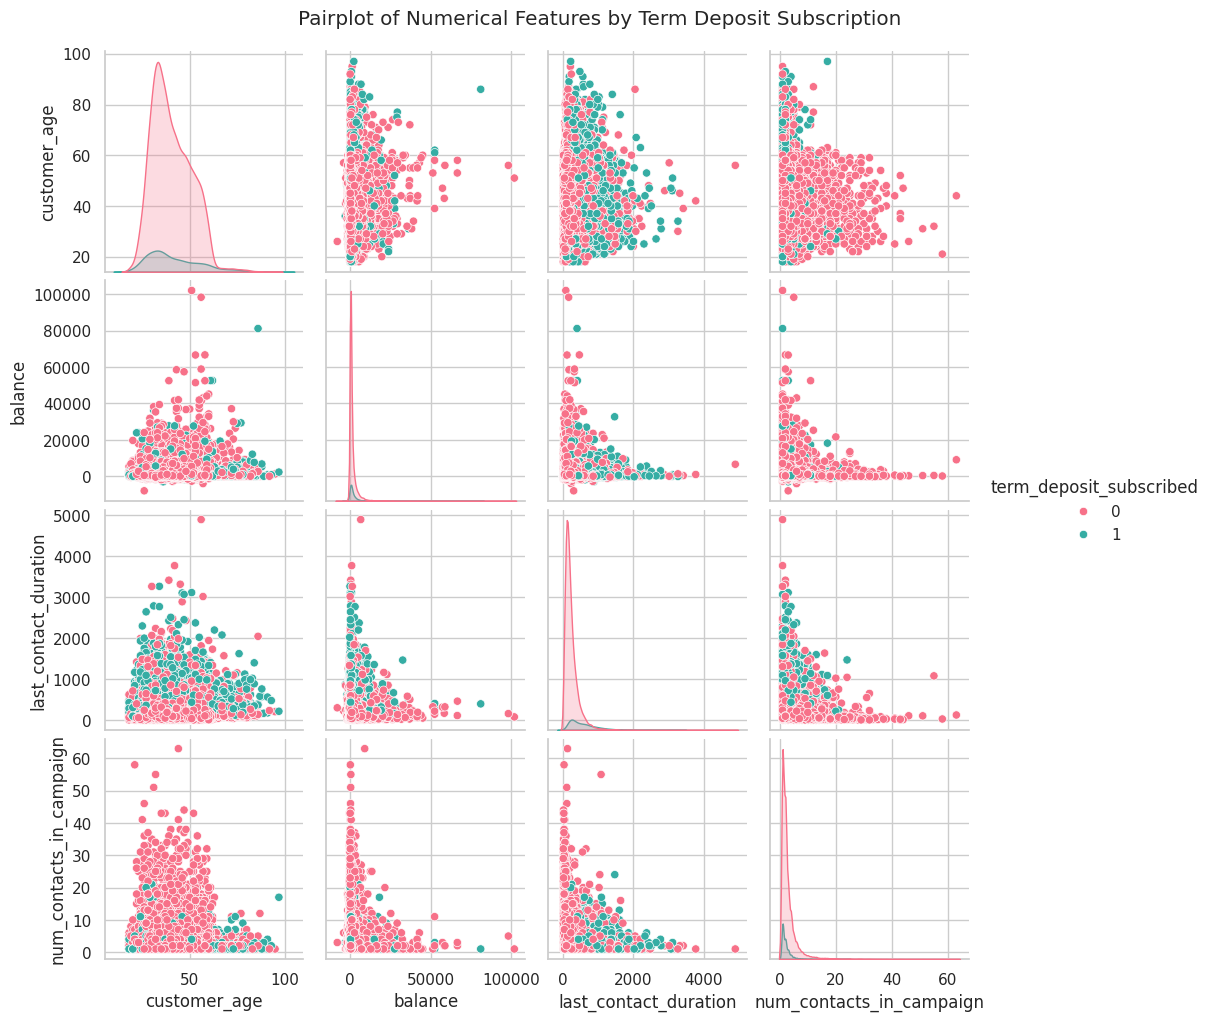

In [ ]:
numerical_features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

sns.pairplot(train_df, hue='term_deposit_subscribed', vars=numerical_features, palette="husl")
plt.suptitle('Pairplot of Numerical Features by Term Deposit Subscription', y=1.02)
plt.show()

1. Diagonal Plots (Univariate Distribution)
Customer Age:
The age distribution is slightly right-skewed with most customers falling between 30 and 60 years old.
There is no clear visual separation between those who subscribed and those who did not based on age alone.
Balance:
The distribution of balance shows that most customers have relatively low balances, but there are some outliers with very high balances.
Customers with higher balances are more likely to subscribe, but the number of non-subscribers remains dominant across most balance ranges.
Last Contact Duration:
This distribution is highly right-skewed with many contacts lasting a short duration, but a few lasting significantly longer.
Longer contact durations correlate positively with term deposit subscriptions.
Number of Contacts in Campaign:
The number of contacts is concentrated at lower values, with a rapid decline as the number of contacts increases.
Higher numbers of contacts seem to have diminishing returns as they do not necessarily lead to higher subscription rates.
2. Off-Diagonal Plots (Bivariate Relationships)
Customer Age vs. Balance:
There isn't a strong visible relationship between age and balance. The distribution is spread out across all ages, with a concentration of customers having balances between 0 and 50,000.
Customer Age vs. Last Contact Duration:
There is no significant pattern between age and the duration of the last contact, although longer contact durations tend to correlate with positive outcomes.
Customer Age vs. Number of Contacts:
This plot shows that younger and middle-aged customers tend to have more campaign contacts, but this doesn't strongly correlate with term deposit subscriptions.
Balance vs. Last Contact Duration:
This relationship indicates that customers with higher balances might have slightly longer conversations, but the plot is dominated by short contacts regardless of balance.
Balance vs. Number of Contacts:
There is no strong relationship between balance and the number of campaign contacts. High and low balances alike can experience varying numbers of contacts.
Last Contact Duration vs. Number of Contacts:
Longer contact durations generally happen within fewer contacts, suggesting that fewer, longer conversations might be more effective for converting to subscriptions.
Key Takeaways:
Last Contact Duration appears to be the most influential feature for predicting subscription, as longer calls seem to correlate with a higher likelihood of subscription.
Balance shows some impact, especially at higher values, though the presence of a large number of non-subscribers complicates this.
Customer Age and Number of Contacts in Campaign don't show strong individual predictive power but might interact with other features to provide better insights.

In [ ]:
num=train_df.select_dtypes(include=[np.number])

<Axes: >

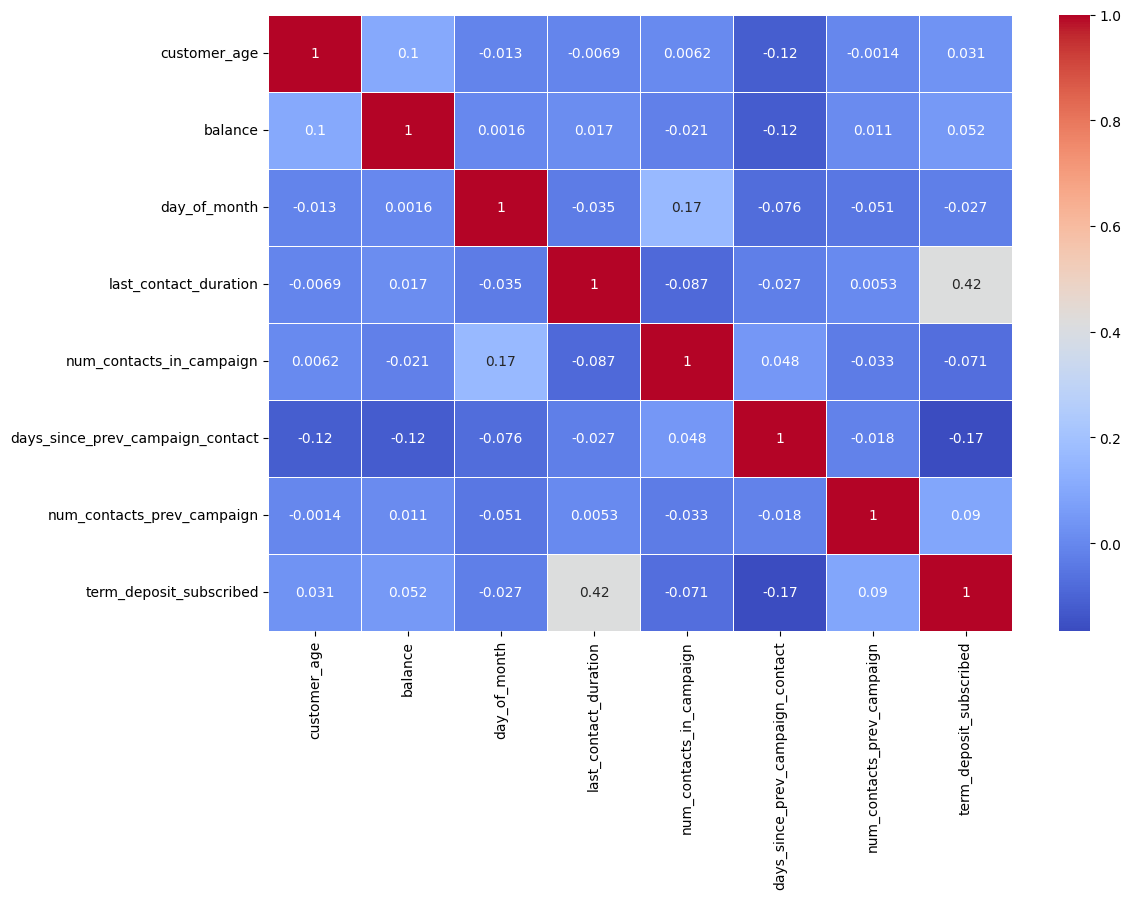

In [ ]:
corr=num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

In [4]:
train_df=train_df.drop(['days_since_prev_campaign_contact'],axis=1)

In [ ]:
train_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [5]:
test_df=pd.read_csv('/content/Test.csv')

In [ ]:
test_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [ ]:
test_df.isnull().sum()

,0
id,0
customer_age,270
job_type,0
marital,81
education,0
default,0
balance,181
housing_loan,0
personal_loan,74
communication_type,0


In [6]:
test_df=test_df.drop(['days_since_prev_campaign_contact'],axis=1)

In [7]:
train_df['customer_age'].fillna(train_df['customer_age'].median(), inplace=True)

In [8]:
test_df['customer_age'].fillna(test_df['customer_age'].median(), inplace=True)

In [9]:
train_df['marital'].fillna(train_df['marital'].mode()[0], inplace=True)

In [10]:
test_df['marital'].fillna(test_df['marital'].mode()[0], inplace=True)

In [11]:
train_df['balance'].fillna(train_df['balance'].median(), inplace=True)

In [12]:
test_df['balance'].fillna(test_df['balance'].median(), inplace=True)

In [13]:
train_df['personal_loan'].fillna(train_df['personal_loan'].mode()[0], inplace=True)

In [14]:
test_df['personal_loan'].fillna(test_df['personal_loan'].mode()[0], inplace=True)

In [15]:
train_df['last_contact_duration'].fillna(train_df['last_contact_duration'].median(), inplace=True)

In [16]:
test_df['last_contact_duration'].fillna(test_df['last_contact_duration'].median(), inplace=True)

In [17]:
train_df['num_contacts_in_campaign'].fillna(train_df['num_contacts_in_campaign'].median(), inplace=True)


In [18]:
test_df['num_contacts_in_campaign'].fillna(test_df['num_contacts_in_campaign'].median(), inplace=True)


In [ ]:
train_df.isnull().sum()

,0
customer_age,0
job_type,0
marital,0
education,0
default,0
balance,0
housing_loan,0
personal_loan,0
communication_type,0
day_of_month,0


In [ ]:
test_df.isnull().sum()

,0
id,0
customer_age,0
job_type,0
marital,0
education,0
default,0
balance,0
housing_loan,0
personal_loan,0
communication_type,0


id is not applicable for this analysis. So dropping the feature

In [19]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

outliers

In [20]:
# Count the number of negative values in the 'balance' column
negative_balance_count = train_df[train_df['balance'] < 0].shape[0]

print(f"Number of negative values in the 'balance' column: {negative_balance_count}")

Number of negative values in the 'balance' column: 3897


Contextual Validity: Since the majority of the negative balances are not flagged as outliers by the IQR method, they might be valid data points, potentially representing overdrafts or other legitimate financial transactions.

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_df['balance'].quantile(0.25)
Q3 = train_df['balance'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of values below the lower bound (outliers)
outliers_below = train_df[train_df['balance'] < lower_bound].shape[0]

# Count the number of negative values in the balance column
negative_balance_count = train_df[train_df['balance'] < 0].shape[0]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Number of outliers below the lower bound: {outliers_below}")
print(f"Number of negative balances: {negative_balance_count}")


Lower bound for outliers: -1903.5
Number of outliers below the lower bound: 11
Number of negative balances: 3897


In [22]:
negative_balances = train_df[train_df['balance'] < 0]

# Define the lower bound for outliers
lower_bound = -1939.5

# Identify outlier rows below the lower bound
outliers = negative_balances[negative_balances['balance'] < lower_bound]

# Select the top 10 outliers if there are more than 10
top_outliers = outliers.head(10)

print("Number of outliers found:", len(top_outliers))
print(top_outliers)

Number of outliers found: 10
       customer_age       job_type   marital  education default  balance  \
2596           36.0  self-employed   married   tertiary      no  -3060.0   
3383           57.0     management  divorced   tertiary      no  -4062.0   
5592           48.0     technician   married  secondary      no  -1945.0   
6014           49.0     management  divorced   tertiary      no  -2046.0   
13012          41.0     technician   married   tertiary     yes  -2827.0   
13394          52.0   entrepreneur   married  secondary     yes  -2086.0   
19400          26.0    blue-collar    single  secondary     yes  -8020.0   
23178          35.0     management    single   tertiary     yes  -1976.0   
25477          51.0     management   married   tertiary      no  -2717.0   
25778          42.0       services   married    primary      no  -2118.0   

      housing_loan personal_loan communication_type  day_of_month month  \
2596           yes           yes           cellular        

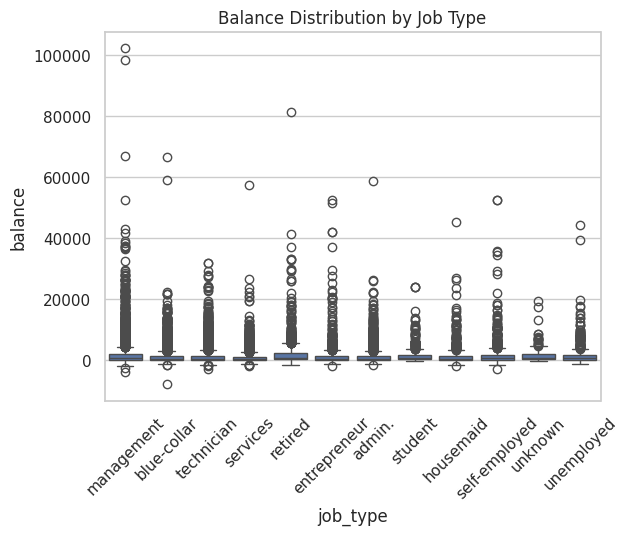

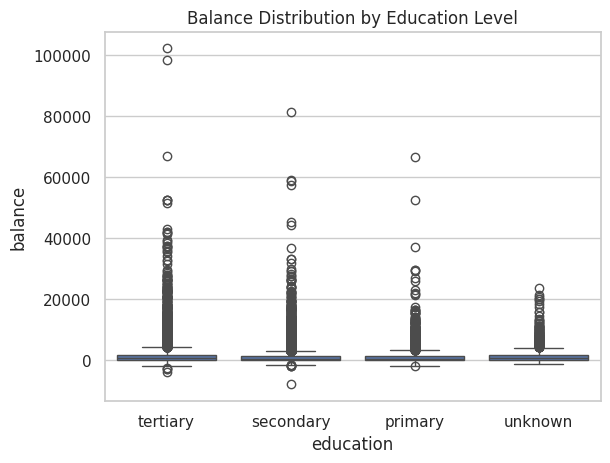

In [ ]:
# Plot balance distribution by job_type
sns.boxplot(data=train_df, x='job_type', y='balance')
plt.xticks(rotation=45)
plt.title('Balance Distribution by Job Type')
plt.show()

# Plot balance distribution by education
sns.boxplot(data=train_df, x='education', y='balance')
plt.title('Balance Distribution by Education Level')
plt.show()

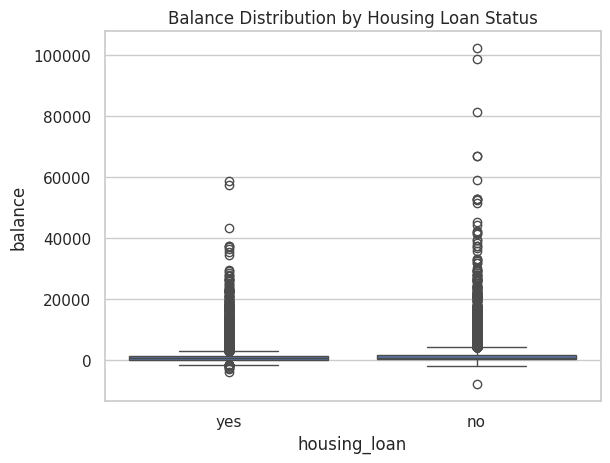

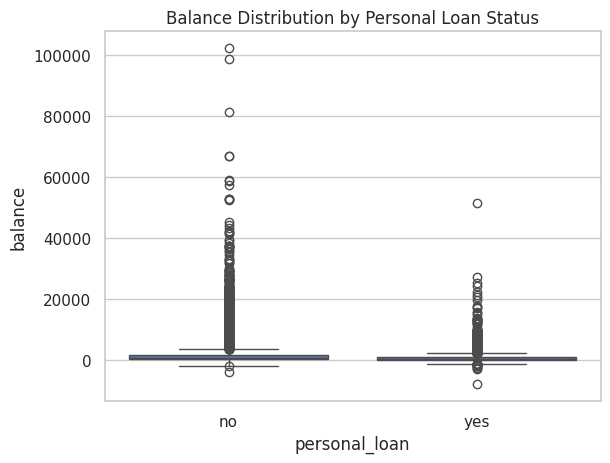

In [ ]:
# Balance distribution by loan status
sns.boxplot(data=train_df, x='housing_loan', y='balance')
plt.title('Balance Distribution by Housing Loan Status')
plt.show()

sns.boxplot(data=train_df, x='personal_loan', y='balance')
plt.title('Balance Distribution by Personal Loan Status')
plt.show()

there is no correlation found between the other features and balance so they can be outliers.

removing them

In [23]:
train_df = train_df[(train_df['balance'] >= lower_bound) & (train_df['balance'] <= upper_bound)]

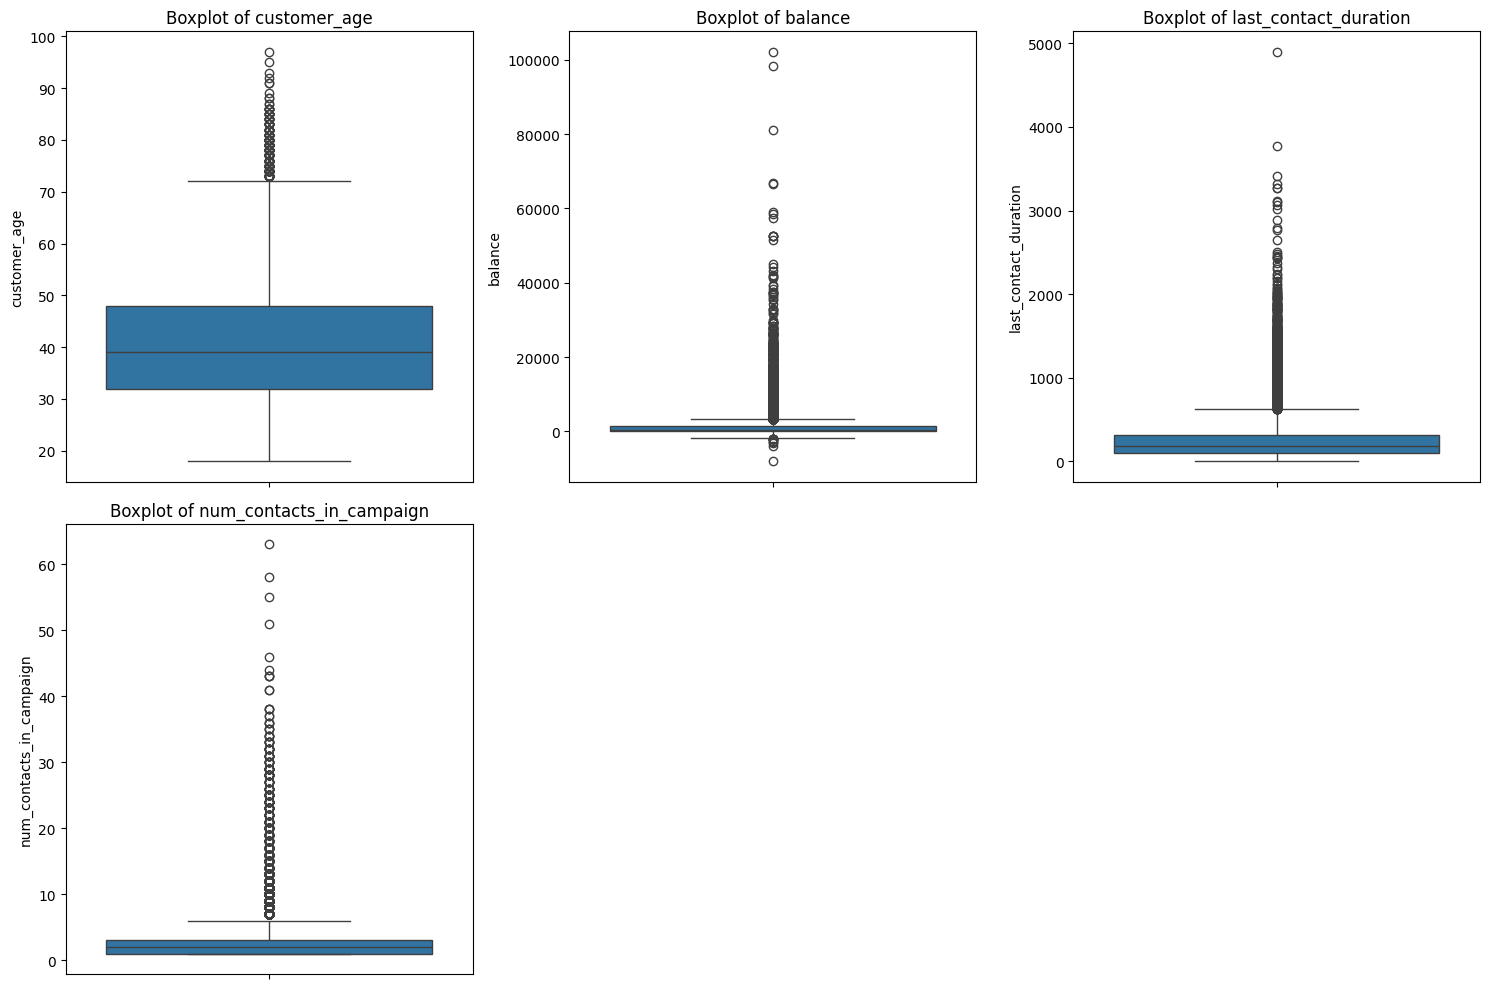

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous columns to inspect for outliers
continuous_columns = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [24]:
columns_to_transform = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

# Apply log transformation to these columns
for column in columns_to_transform:
    # Since log is not defined for non-positive values, we will use log1p (log(1+x)) which handles zero values
    train_df[column] = np.log1p(train_df[column])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


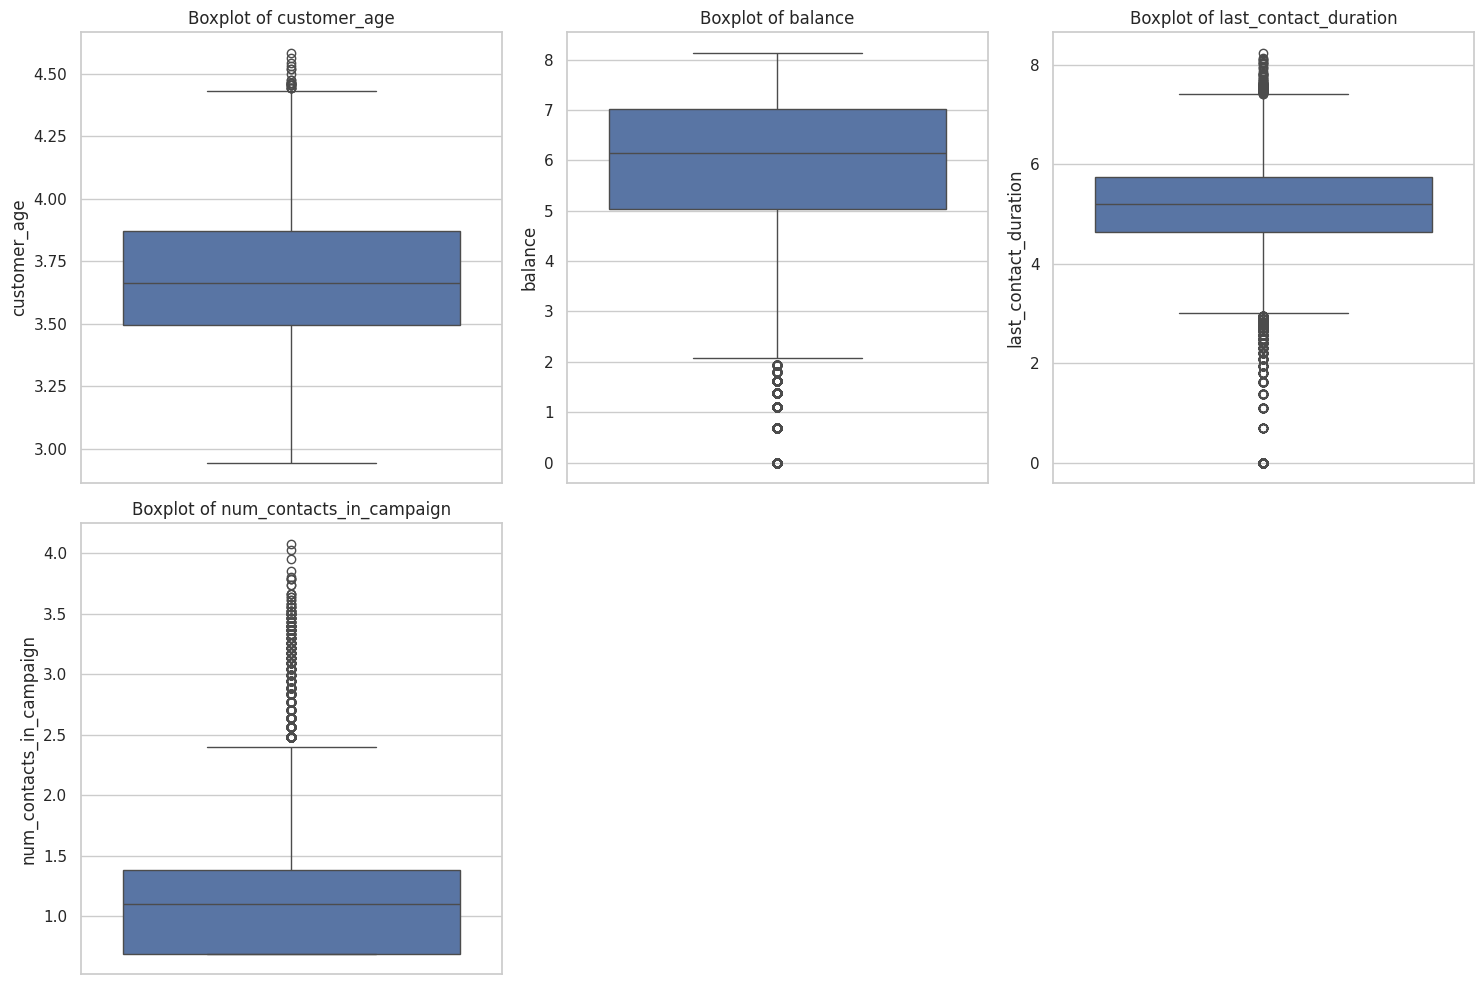

In [ ]:
continuous_columns = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [25]:
train_df.to_csv('train2.csv', index=False)


In [ ]:
train_df.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [ ]:
test_df.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome'],
      dtype='object')

In [26]:
test_df = test_df[(test_df['balance'] >= lower_bound) & (test_df['balance'] <= upper_bound)]

In [27]:
for column in columns_to_transform:
    # Since log is not defined for non-positive values, we will use log1p (log(1+x)) which handles zero values
    test_df[column] = np.log1p(test_df[column])

In [28]:
train_df=train_df.drop(['term_deposit_subscribed'],axis=1)

In [29]:
test_df.to_csv('test2.csv', index=False)


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [31]:
df_test=pd.read_csv('/content/test2.csv')

In [32]:
df_train=pd.read_csv('/content/train2.csv')

In [33]:
train_df_encoded = pd.get_dummies(df_train, drop_first=True)

In [34]:
test_df_encoded = pd.get_dummies(df_test, drop_first=True)

In [36]:
train_df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)


In [37]:
train_df_encoded.fillna(train_df_encoded.mean(), inplace=True)  # Replace NaNs with the mean of each column


feature selection

In [38]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(train_df_encoded)


In [ ]:
train_df_encoded.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'job_type_blue-collar', 'job_type_entrepreneur', 'job_type_housemaid',
       'job_type_management', 'job_type_retired', 'job_type_self-employed',
       'job_type_services', 'job_type_student', 'job_type_technician',
       'job_type_unemployed', 'job_type_unknown', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_loan_yes',
       'personal_loan_yes', 'communication_type_telephone',
       'communication_type_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown'],
      dtype='object')

In [39]:
# Get the variances of all features
variances = selector.variances_

# Get the column names from the original one-hot encoded DataFrame
columns = train_df_encoded.columns

# Filter columns that were selected (variance > threshold)
selected_columns = columns[selector.get_support()]

# Display the selected columns
selected_columns


Index(['balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'job_type_blue-collar', 'job_type_management', 'job_type_technician',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_loan_yes', 'personal_loan_yes',
       'communication_type_unknown', 'month_aug', 'month_jul', 'month_jun',
       'month_may', 'prev_campaign_outcome_unknown'],
      dtype='object')

In [40]:
train_df_selected = train_df_encoded[selected_columns]

In [ ]:
test_df_encoded.isnull().sum()

,0
customer_age,0
balance,1558
day_of_month,0
last_contact_duration,0
num_contacts_in_campaign,0
num_contacts_prev_campaign,0
job_type_blue-collar,0
job_type_entrepreneur,0
job_type_housemaid,0
job_type_management,0


In [41]:
# Replace infinity with NaN
test_df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of each column (or choose an appropriate strategy)
test_df_encoded.fillna(test_df_encoded.mean(), inplace=True)


In [42]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(test_df_encoded)

In [44]:
selected_columns = test_df_encoded.columns[selector.get_support()]

In [45]:
test_df_selected = test_df_encoded[selected_columns]

In [46]:
# Standardize the features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df_selected)
test_scaled = scaler.transform(test_df_selected)


pca

In [51]:
#
pca = PCA(n_components=5)  # Example to reduce to 5 dimensions
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)


K-Means Clustering

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(train_pca)

# Evaluate K-Means
kmeans_silhouette = silhouette_score(train_pca, kmeans_labels)
kmeans_db = davies_bouldin_score(train_pca, kmeans_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'K-Means Davies-Bouldin Score: {kmeans_db}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Silhouette Score: 0.2193107354691577
K-Means Davies-Bouldin Score: 1.6599021174148882


Hierarchical Clustering (Agglomerative Clustering)


In [53]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(train_pca)

# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(train_pca, hierarchical_labels)
hierarchical_db = davies_bouldin_score(train_pca, hierarchical_labels)

print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')
print(f'Hierarchical Davies-Bouldin Score: {hierarchical_db}')


Hierarchical Silhouette Score: 0.21038212635053402
Hierarchical Davies-Bouldin Score: 1.6351941771999867


DBSCAN

In [54]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(train_pca)

# Evaluate DBSCAN (note: DBSCAN can sometimes assign -1 to noise points)
dbscan_silhouette = silhouette_score(train_pca, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'
dbscan_db = davies_bouldin_score(train_pca, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'

print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'DBSCAN Davies-Bouldin Score: {dbscan_db}')


DBSCAN Silhouette Score: 0.1373435572078442
DBSCAN Davies-Bouldin Score: 1.463942912447269


the best algorithm seems to be k-means

fine tuning

In [55]:


# Try a range of k values
k_values = range(2, 11)
best_k = None
best_silhouette = -1
best_db_score = float('inf')

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(train_pca)

    silhouette_avg = silhouette_score(train_pca, kmeans_labels)
    db_score = davies_bouldin_score(train_pca, kmeans_labels)

    print(f'For k = {k}: Silhouette Score = {silhouette_avg}, Davies-Bouldin Score = {db_score}')

    # Track the best score
    if silhouette_avg > best_silhouette and db_score < best_db_score:
        best_k = k
        best_silhouette = silhouette_avg
        best_db_score = db_score

print(f'Best K: {best_k}, Silhouette Score: {best_silhouette}, Davies-Bouldin Score: {best_db_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 2: Silhouette Score = 0.22936886133974607, Davies-Bouldin Score = 1.7428842238961515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 3: Silhouette Score = 0.2193107354691577, Davies-Bouldin Score = 1.6599021174148882


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 4: Silhouette Score = 0.2451291718405283, Davies-Bouldin Score = 1.3936985750105562


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 5: Silhouette Score = 0.2663238347651263, Davies-Bouldin Score = 1.2741746582784625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 6: Silhouette Score = 0.26758553640826854, Davies-Bouldin Score = 1.154466172162819


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 7: Silhouette Score = 0.27882240317939644, Davies-Bouldin Score = 1.2232640910386368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 8: Silhouette Score = 0.27458622195376603, Davies-Bouldin Score = 1.2099105228361322


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 9: Silhouette Score = 0.2698336774651993, Davies-Bouldin Score = 1.2090237241320108


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 10: Silhouette Score = 0.278480595326518, Davies-Bouldin Score = 1.2170987065294163
Best K: 6, Silhouette Score: 0.26758553640826854, Davies-Bouldin Score: 1.154466172162819


The best k value is 6, based on the balance between the Silhouette and Davies-Bouldin scores